In [1]:
from fastai.vision import *

In [74]:
path = './fruits-360-dataset/fruits-360/'
tfms = get_transforms(do_flip = True,
                      flip_vert = True,
                      max_rotate = 5.0,
                      max_zoom = 0.0,
                      max_lighting = 0.0,
                      max_warp = 0.0,
                      p_affine = 0.0,
                      p_lighting = 0.0,)

In [75]:
# data = (ImageList.from_folder(path+'Training') #Where to find the data? -> in path and its subfolders
#         .split_by_rand_pct(0.2)              #How to split in train/valid? -> use the folders
#         .label_from_folder()            #How to label? -> depending on the folder of the filenames
#         .add_test_folder(test_folder = './fruits-360-dataset/fruits-360/Test')              #Optionally add a test set (here default name is test)
#         .transform(tfms, size=64)       #Data augmentation? -> use tfms with a size of 64
#         .databunch(bs=1024))                   #Finally? -> use the defaults for conversion to ImageDataBunch



data = ImageDataBunch.from_folder(path, train='Training', valid='Test',
#                                   test= 'Test',
                                  ds_tfms=get_transforms(do_flip=True,flip_vert=True),
#                                   valid_pct=0.15,
                                  size = 64,
                                  num_workers=8,
                                  bs = 1024).normalize(imagenet_stats)

In [65]:
data


ImageDataBunch;

Train: LabelList (60498 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
Pear,Pear,Pear,Pear,Pear
Path: fruits-360-dataset/fruits-360;

Valid: LabelList (20622 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
Pear,Pear,Pear,Pear,Pear
Path: fruits-360-dataset/fruits-360;

Test: None

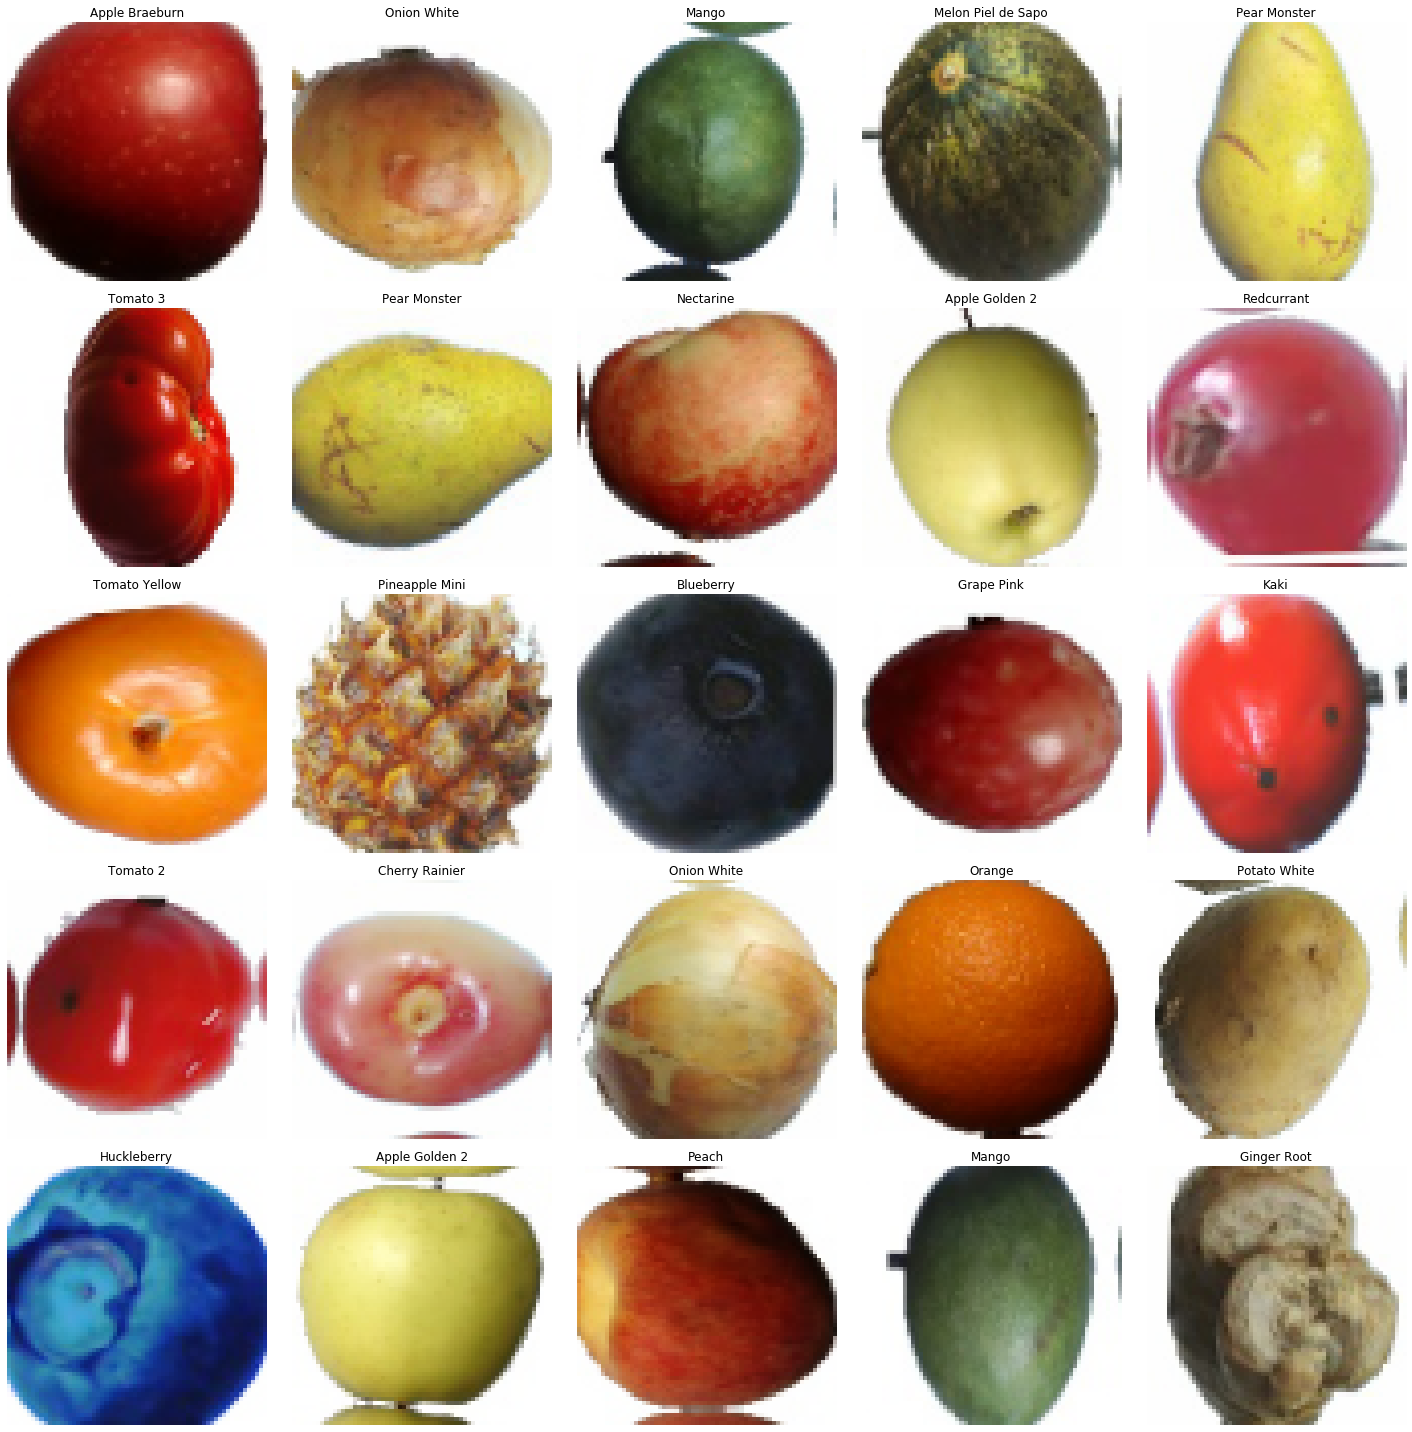

In [53]:
data.show_batch(5)

In [54]:
 data.c

121

In [55]:
data.c, len(data.train_ds), len(data.valid_ds)

(121, 51514, 9090)

In [66]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate, accuracy])

In [67]:
len(data.train_ds)/945

64.01904761904763

In [68]:
lr_find(learn)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


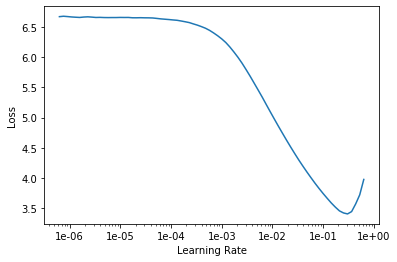

In [69]:
learn.recorder.plot()

In [76]:
learn.fit_one_cycle(1, max_lr=1e-4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.046041,0.061299,0.018960,0.981040,00:34


In [72]:
lr_find(learn)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


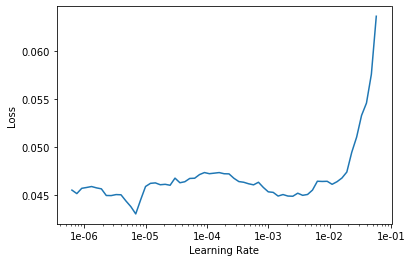

In [73]:
learn.recorder.plot()